## Line chart with styles

In [1]:
import pandas as pd
import sqlite3

### Connection to sqlite3

In [2]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite")

### Seeing data checker and pageviews

In [3]:
pd.read_sql("PRAGMA table_info(checker);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [4]:
pd.read_sql("PRAGMA table_info(pageviews);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


### Pageviews views counts

In [5]:
query_views = """
SELECT date(datetime) as date, COUNT(*) as views
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY date(datetime);
"""
df_views = pd.read_sql_query(query_views, conn)
df_views

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


### checker commits counts

In [6]:
query_commits = """
SELECT date(timestamp) as date, COUNT(*) as commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date(timestamp);
"""
df_commits = pd.read_sql_query(query_commits, conn)
df_commits

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


### Merge df_views and df_commits for creating graph

In [7]:
df_merged = pd.merge(df_views, df_commits, on='date', how='inner')
df_merged

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


### Graph

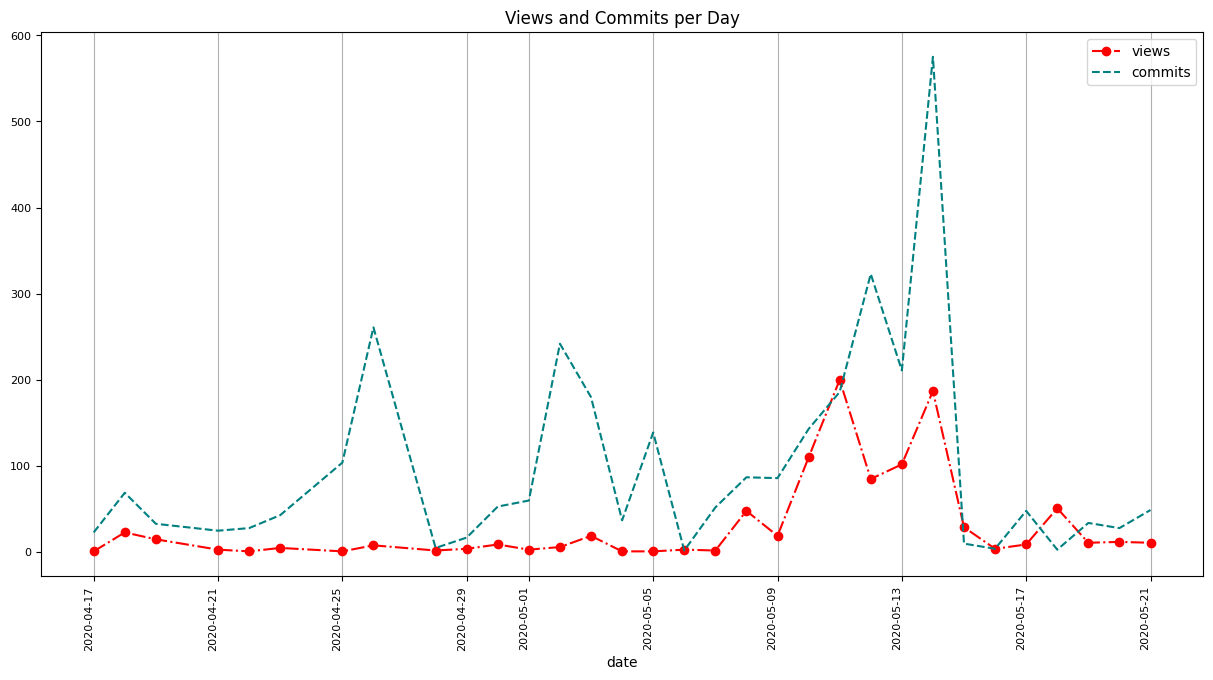

In [8]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

tick_dates = [
    '2020-04-17', '2020-04-21', '2020-04-25', '2020-04-29',
    '2020-05-01', '2020-05-05', '2020-05-09', '2020-05-13',
    '2020-05-17', '2020-05-21'
]
tick_dates_filtered = [pd.Timestamp(d) for d in tick_dates if pd.Timestamp(d) in df_merged['date'].values]

ax = df_merged.plot(
    x='date',
    y='views',
    kind='line',
    marker='o',
    linestyle='-.',
    label='views',
    color='red',
    figsize=(15, 8),
    fontsize=8,
    title="Views and Commits per Day"
)

df_merged.plot(
    x='date',
    y='commits',
    kind='line',
    linestyle='--',
    ax=ax,
    label='commits',
    color='teal'
)

ax.grid(axis='x')
ax.set_xticks(tick_dates_filtered)
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in tick_dates_filtered], rotation=90);

In [9]:
sum_larger_150 = (df_merged['views'] > 150).sum()
print(sum_larger_150)

2


### The answer is `2`

### Connection closed

In [10]:
conn.close()